# Getting Started

In this tutorial, you'll learn the basics of using the `py21cmsense` library. See the [README](https://github.com/steven-murray/21cmSense) or the [CLI-tutorial](https://21cmsense.readthedocs.io/en/latest/tutorials/cli_tutorial.html) for information on the CLI interface.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as un

%matplotlib inline

from tuesday.core import calculate_ps, cylindrical_to_spherical
import powerbox as pb

## Calculate the PS from a coeval box

Let's make a test coeval box using `powerbox`.

In [5]:
delta_x = pb.PowerBox(
    N=32,                     # Number of grid-points in the box
    dim=3,                     # 2D box
    pk = lambda k: 0.1*k**-2., # The power-spectrum
    boxlength = 200.0,         # Size of the box (sets the units of k in pk)
    seed = 1010                # Set a seed to ensure the box looks the same every time (optional)
).delta_x()
delta_x_redshift = np.linspace(0,200,delta_x.shape[-1])

In [21]:
delta_x.shape

(32, 32, 32)

Let's calculate the PS on this box:

In [19]:
ps = calculate_ps(delta_x, delta_x_redshift, zs = [100.], box_length=200., calc_2d=False, calc_1d=True, prefactor_fnc=None)

/home/dani/miniconda3/envs/21cmFAST/lib/python3.11/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)
/home/dani/miniconda3/envs/21cmFAST/lib/python3.11/site-packages/powerbox/tools.py:287: RuntimeWarning: invalid value encountered in divide
  np.bincount(
/home/dani/miniconda3/envs/21cmFAST/lib/python3.11/site-packages/powerbox/tools.py:732: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/home/dani/miniconda3/envs/21cmFAST/lib/python3.11/site-packages/powerbox/tools.py:551: RuntimeWarning: invalid value encountered in divide
  np.bincount(


[]

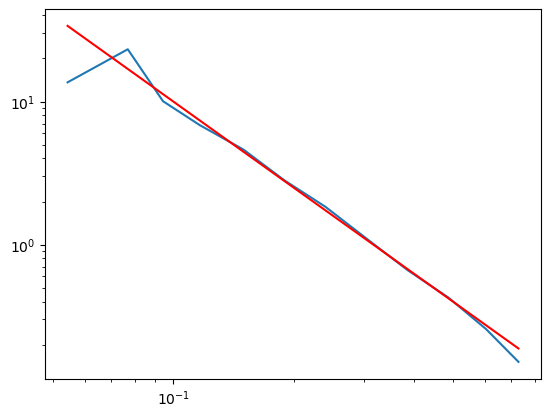

In [20]:
plt.plot(ps['k'], ps['ps_1D'].squeeze())
plt.plot(ps['k'], 0.1*ps['k']**-2., color = 'r')
plt.loglog()